In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_cleaned.csv')
target = pd.read_csv('train_target.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,FDA15,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,DRC01,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,Drinks,4
2,FDN15,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
3,FDX07,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,Food,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,Non-Consumables,26


In [4]:
df.columns = df.columns.str.lower() #for better use

In [5]:
# splitting the inital test set from the dataframe
test = df.loc[8523:]
test.reset_index(drop=True,inplace = True)

In [6]:
#splitting the initial train set from the dataframe 
train = df.loc[:8522]
train.reset_index(drop=True,inplace = True)

In [7]:
train = pd.concat([train,target],axis = 1)

In [8]:
train['item_fat_content'].unique()

array(['LOW FAT', 'REGULAR', 'Non-Edible'], dtype=object)

In [9]:
train['Item_Outlet_Sales'] = np.log(1+train['Item_Outlet_Sales'])

In [10]:
train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,new_item_type,outlet_years,Item_Outlet_Sales
0,FDA15,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14,8.225808
1,DRC01,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,Drinks,4,6.096776
2,FDN15,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14,7.648868
3,FDX07,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,Food,15,6.597664
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,Non-Consumables,26,6.903451


In [11]:
data = train.copy()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['outlet_identifier'])

dummy_col = ['item_fat_content','item_type','new_item_type']

data = pd.get_dummies(data,columns = dummy_col,drop_first = True)


label_col = ['outlet_size','outlet_location_type','outlet_type']
for col in label_col:
    data[col] = le.fit_transform(data[col])

In [13]:
data.drop(columns = ['item_identifier','outlet_identifier','outlet_establishment_year'],inplace = True)

In [14]:
data.columns

Index(['item_weight', 'item_visibility', 'item_mrp', 'outlet_size',
       'outlet_location_type', 'outlet_type', 'outlet_years',
       'Item_Outlet_Sales', 'Outlet', 'item_fat_content_Non-Edible',
       'item_fat_content_REGULAR', 'item_type_Breads', 'item_type_Breakfast',
       'item_type_Canned', 'item_type_Dairy', 'item_type_Frozen Foods',
       'item_type_Fruits and Vegetables', 'item_type_Hard Drinks',
       'item_type_Health and Hygiene', 'item_type_Household', 'item_type_Meat',
       'item_type_Others', 'item_type_Seafood', 'item_type_Snack Foods',
       'item_type_Soft Drinks', 'item_type_Starchy Foods',
       'new_item_type_Food', 'new_item_type_Non-Consumables'],
      dtype='object')

In [15]:
Y = data.Item_Outlet_Sales.values
X = data.drop('Item_Outlet_Sales',axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.2,random_state = 2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [16]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

dt_reg = DecisionTreeRegressor(random_state = 0)
neigh = KNeighborsRegressor(n_neighbors=2)
lin_reg = LinearRegression()
rid_reg = Ridge()
svm_reg = SVR()
rf_reg = RandomForestRegressor(max_depth = 3)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#for lasso regression with different cvs
alphas = [0.1,0.001,0.005,0.008,0.0005,0.006,0.008,0.0001]
error = []
alpha = []
for i in range(1,10):
    alpha.append(i/1000)
    las_reg = Lasso(alpha = i/1000)
    error.append(np.mean(cross_val_score(las_reg,X_train,Y_train,cv = 5,scoring = 'neg_mean_absolute_error')))

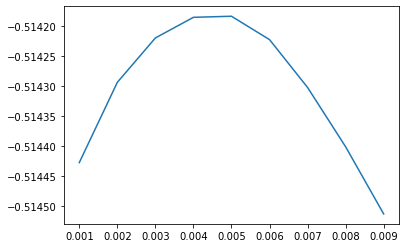

In [18]:
plt.plot(alpha,error)

In [19]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
4,0.005,-0.514183


In [20]:
new_las_reg = Lasso(alpha = 0.004)
las_cv_score = cross_val_score(new_las_reg,X_train,Y_train,cv = 5)
np.mean(las_cv_score)

0.5928302249579773

In [21]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [28]:
def train(models_list,x_train,x_test,y_train,y_test):
    models = []
    cv_scores = []
    mses = []
    R2_score = []
    for model in models_list:
        models.append(model)
        #training the model
        model.fit(x_train,y_train)
        cv_score = cross_val_score(model, x_train,y_train,cv=5)
        cv_score = np.mean(cv_score)
        cv_scores.append(cv_score)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test,y_pred)
        mses.append(mse)
        score = r2_score(y_test,y_pred)
        R2_score.append(score)
    return models,cv_scores,mses,R2_score


In [29]:
input_list = [lin_reg,new_las_reg,rid_reg,svm_reg,dt_reg,neigh]

In [30]:
models,cv_scores,mses,R2_score = train(input_list,X_train,X_test,Y_train,Y_test)
train(input_list,X_train,X_test,Y_train,Y_test)

([LinearRegression(),
  Lasso(alpha=0.004),
  Ridge(),
  SVR(),
  DecisionTreeRegressor(random_state=0),
  KNeighborsRegressor(n_neighbors=2)],
 [0.5914783957589698,
  0.5928302249579773,
  0.5914883110438758,
  0.7047446032419447,
  0.45349565299427824,
  0.5295230325838169],
 [0.4219941134663248,
  0.42187109083943036,
  0.42197526451259326,
  0.2943278318066737,
  0.5632799469025956,
  0.4460193811128059],
 [0.5845537591496179,
  0.5846748728956439,
  0.5845723156335163,
  0.7102391066611788,
  0.44546018766737994,
  0.5609012796229067])

In [31]:
pd.DataFrame({'Model': models,'CV_Score' : cv_scores,'MSE' : mses,'R2_Score' : R2_score})

,Model,CV_Score,MSE,R2_Score
0,LinearRegression(),0.591478,0.421994,0.584554
1,Lasso(alpha=0.004),0.592830,0.421871,0.584675
2,Ridge(),0.591488,0.421975,0.584572
3,SVR(),0.704745,0.294328,0.710239
4,DecisionTreeRegressor(random_state=0),0.453496,0.563280,0.445460
5,KNeighborsRegressor(n_neighbors=2),0.529523,0.446019,0.560901


In [26]:
def mono_train(model,x_train,x_test,y_train,y_test):
    #training the model
    model.fit(x_train,y_train)
    cv_score = cross_val_score(model, x_train,y_train,cv=5)
    cv_score = np.mean(cv_score)
    print('cv_Score',cv_score)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    print('mse',mse)
    score = r2_score(Y_test,y_pred)
    print('r2_score',score)

In [27]:
data.head()

,item_weight,item_visibility,item_mrp,outlet_size,outlet_location_type,outlet_type,outlet_years,Item_Outlet_Sales,Outlet,item_fat_content_Non-Edible,...,item_type_Health and Hygiene,item_type_Household,item_type_Meat,item_type_Others,item_type_Seafood,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods,new_item_type_Food,new_item_type_Non-Consumables
0,9.30,0.016047,249.8092,1,0,1,14,8.225808,9,0,...,0,0,0,0,0,0,0,0,1,0
1,5.92,0.019278,48.2692,1,2,2,4,6.096776,3,0,...,0,0,0,0,0,0,1,0,0,0
2,17.50,0.016760,141.6180,1,0,1,14,7.648868,9,0,...,0,0,1,0,0,0,0,0,1,0
3,19.20,0.000000,182.0950,1,2,0,15,6.597664,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.93,0.000000,53.8614,0,2,1,26,6.903451,1,1,...,0,1,0,0,0,0,0,0,0,1
